<a href="https://colab.research.google.com/github/deanhadzi/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [x] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [x] Get your validation accuracy score.
- [x] Get and plot your feature importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 133kB 16.7MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 42.6MB/s 
     |████████████████████████████████| 225kB 49.3MB/s 
     |████████████████████████████████| 307kB 48.2MB/s 
     |████████████████████████████████| 194kB 50.5MB/s 
     |████████████████████████████████| 51kB 16.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 727kB 36.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=9dc6f420168c0aed9382a5b08f8b96bc12c7ec71b76853be95ebd0ece5ab2292
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=0b99507d7a053523c2c980e5d2e946c216821ac80

In [0]:
# Importing necessary libraries and modules.

import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


In [3]:
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train.profile_report()

In [4]:
# Do train/validate/test split with the Tanzania Waterpumps data.

train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              random_state=42, stratify=train['status_group'])

train.shape, val.shape

((47520, 41), (11880, 41))

In [0]:
# Define a function to wrangle train, validate, and test sets in the same way. 
# Clean outliers and engineer features. 
# (For example, what other columns have zeros and shouldn't? 
# What other columns are duplicates, or nearly duplicates? 
# Can you extract the year from date_recorded? 
# Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)

def wrangle(X):
    """Wrangle data frames"""

    # Prevent SettingWithCopyWarning
    X = X.copy()

    # Dropping redundant columns.
    X = X.drop(columns=['quantity_group', 'recorded_by', 'num_private', 
                        'payment_type', 'id'])

    # Replace small latitudes with zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)

    # Start selecting the numeric features.
    numeric = X.select_dtypes('number').columns.tolist()

    # Replace all zeros in numeric features with np.nan.
    for col in numeric:
        X[col] = X[col].replace(0, np.nan)

    # Keep only features with np.nan below 0.4 in frequency.
    numeric_features = []

    for col in numeric:
        if X[col].isna().sum() < 0.4 * len(X[col]):
            numeric_features.append(col)
        else:
            continue

    # Select categorical features.
    cardinality = X.select_dtypes(exclude='number').nunique()

    # Get a list of all categorical features with cardinality <= 50
    categorical_features = cardinality[cardinality <= 50].index.tolist()

    # Final list of features
    features = numeric_features + categorical_features

    # Returning wrangled data.
    return X[features]

In [6]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((47520, 27), (11880, 27), (14358, 26))

In [7]:
# Arranging the data into X features and y target vector

target = 'status_group'

y_train = train[target]
X_train = train.drop(columns=target)

y_val = val[target]
X_val = val.drop(columns=target)

X_test = test

y_train.shape, X_train.shape, y_val.shape, X_val.shape, X_test.shape

((47520,), (47520, 26), (11880,), (11880, 26), (14358, 26))

In [8]:
# Creating the pipeline.

hw_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5,
                           random_state=42)
)

hw_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source', 'source_type',
                                     'source_class', 'waterpoint_type',
                                     'waterpoint_typ...
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                 

In [9]:
# Get your validation accuracy score.

hw_pipeline.score(X_val, y_val)

0.7749158249158249

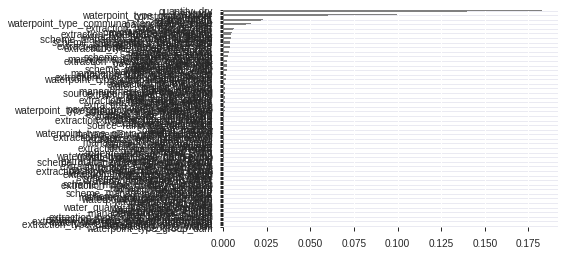

In [10]:
# Get and plot your feature importances.

model = hw_pipeline.named_steps['decisiontreeclassifier']
encoder = hw_pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_train).columns 
importances = pd.Series(model.feature_importances_, encoded_columns)
importances.sort_values().plot.barh(color='grey')
plt.show()
